### `Logistic Regression`

Step 1: Import Required Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report
)
from matplotlib.colors import ListedColormap

Step 2: Generate Sample Binary Classification Data

In [4]:
X, y = make_classification(
    n_samples=200, 
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
    ) 

Plot raw data  

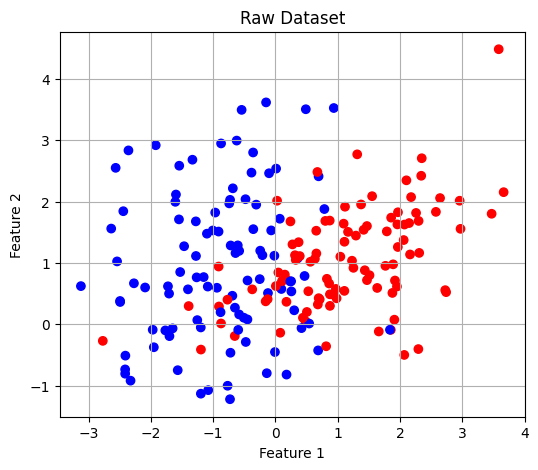

In [5]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:,0], X[:,-1], c=y, cmap="bwr")
plt.title("Raw Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

 Step 3: Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Step 4: Train the Logistic Regression Model

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Step 5: Make Predictions & Check Accuracy

In [8]:
y_pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.78      0.96      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60



Step 6: Confusion Matrix

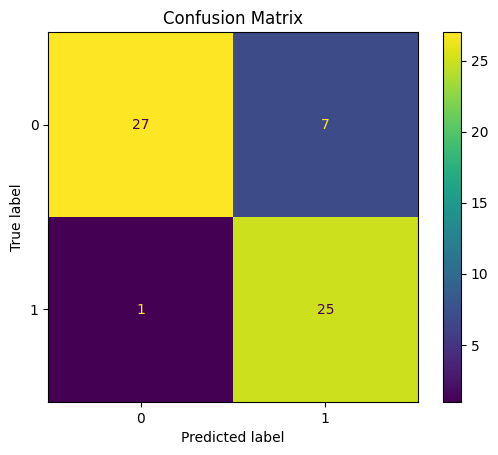

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Step 7: Visualize Decision Boundary


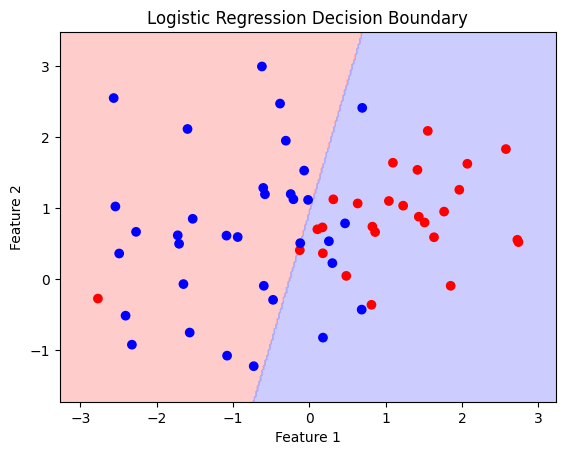

In [10]:
def plot_decision_boundary(X,y,model):
    h = 0.02  # step size of the mesh

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

plot_decision_boundary(X_test, y_test, model)


 `Sigmoid Curve Visualization (for single feature)`

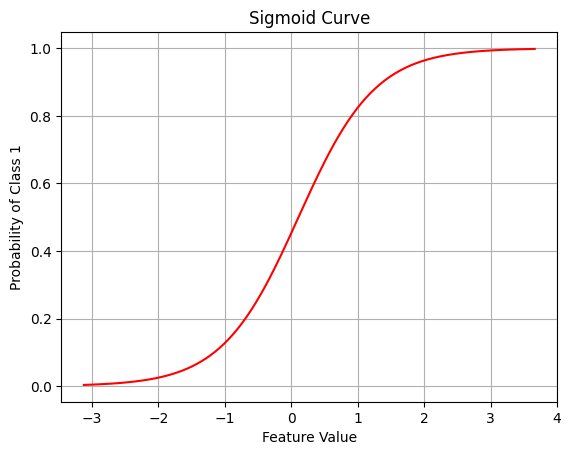

In [11]:
# Extract one feature only for 1D sigmoid plot
X_1d = X[:, 0].reshape(-1, 1)

model_1d = LogisticRegression()
model_1d.fit(X_1d, y)

# Predict probability
x_vals = np.linspace(X_1d.min(), X_1d.max(), 300).reshape(-1, 1)
y_probs = model_1d.predict_proba(x_vals)[:, 1]

plt.plot(x_vals, y_probs, color='red')
plt.title("Sigmoid Curve")
plt.xlabel("Feature Value")
plt.ylabel("Probability of Class 1")
plt.grid(True)
plt.show()


Sigmoid Curve Visualization:

σ(z)= 1 / (1 + e^-z) 


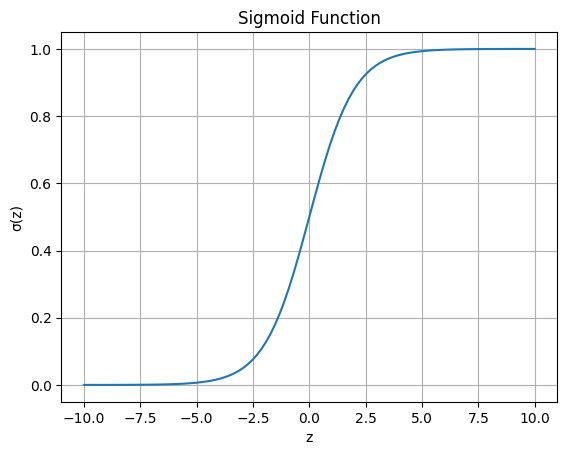

In [12]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()
